In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore") 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBRegressor

In [0]:
def applyFunctionOverArrayInColumn(dataframe, columnName, newColumnName, func, containsApostrophe, isNums=False):
  dataframe[newColumnName] = dataframe[columnName]
  if containsApostrophe:
    dataframe.loc[:, newColumnName] = dataframe[newColumnName].map(lambda x: [y[1:-1] for index, y in enumerate(x)])

  if isNums:
    dataframe.loc[:, newColumnName] = dataframe[newColumnName].map(lambda x: x[1:-1])
    dataframe.loc[:, newColumnName] = dataframe[newColumnName].str.split(', ')
    dataframe.loc[:, newColumnName] = dataframe[newColumnName].map(lambda x: [int(y) for y in x if len(y) != 0])
  dataframe.loc[:, newColumnName] = dataframe[newColumnName].map(func)
  

In [0]:
LOG_LEVEL = 2 # 1 INFO, 2 DEBUG
def log(message, level=2):
  if level<=LOG_LEVEL:
    print(datetime.now(), message)

def init(csv_file='Kaggle/kaggle_test.csv'):
 
  complete_dataset = pd.read_csv(csv_file)
  complete_dataset=pd.DataFrame(complete_dataset)
  complete_dataset=complete_dataset.head(complete_dataset.shape[0]-1)
  complete_dataset[complete_dataset['Event']=='Event']

  x=complete_dataset['Event']
  indexNames=x[x=='Event'].index
  complete_dataset.drop(indexNames , inplace=True)

  complete_dataset['Event'][complete_dataset['Event'].str.contains('Blitz')]='Blitz'
  complete_dataset['Event'][complete_dataset['Event'].str.contains('Classic')]='Classic'
  complete_dataset['Event'][complete_dataset['Event'].str.contains('Bullet')]='Bullet'
  complete_dataset['Event'][complete_dataset['Event'].str.contains('Correspondence')]='Correspondence'

  log("Completed reading dataset from csv file: "+csv_file)
  complete_dataset['BlackMoves']=complete_dataset['Moves']	
  complete_dataset['BlackMoves'] = complete_dataset['BlackMoves'].str[1:]
  complete_dataset['BlackMoves'] = complete_dataset['BlackMoves'].str[:-1]
  complete_dataset['BlackMoves']=complete_dataset['BlackMoves'].str.split(', ')
  
  complete_dataset.loc[:, 'BlackMoves'] = complete_dataset.BlackMoves.map(lambda x: x[1::2])
  
  complete_dataset['WhiteMoves']=complete_dataset['Moves']
  complete_dataset['WhiteMoves'] = complete_dataset['WhiteMoves'].str[1:]
  complete_dataset['WhiteMoves'] = complete_dataset['WhiteMoves'].str[:-1]
  complete_dataset['WhiteMoves']=complete_dataset['WhiteMoves'].str.split(', ')
  complete_dataset.loc[:, 'WhiteMoves'] = complete_dataset.WhiteMoves.map(lambda x: x[0::2])
  le = preprocessing.LabelEncoder()
  le.fit(complete_dataset['ECO'])
  complete_dataset['ECO_Labels']=le.transform(complete_dataset['ECO'])
  log("Extracted features: BlackMoves and WhiteMoves")
  min_moves = 10
  applyFunctionOverArrayInColumn(complete_dataset, 'WhiteCenter', 'White_Open_Center', lambda x: np.mean(x[:10]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'WhiteCenter', 'White_Mid_Center', lambda x: np.mean(x[10:28]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'WhiteCenter', 'White_End_Center', lambda x: np.mean(x[28:]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'BlackCenter', 'Black_Open_Center', lambda x: np.mean(x[:10]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'BlackCenter', 'Black_Mid_Center', lambda x: np.mean(x[10:28]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'BlackCenter', 'Black_End_Center', lambda x: np.mean(x[28:]) if len(x) > min_moves else 0.0, False, True)
  
  applyFunctionOverArrayInColumn(complete_dataset, 'WhiteDiag', 'White_Open_Diag', lambda x: np.mean(x[:10]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'WhiteDiag', 'White_Mid_Diag', lambda x: np.mean(x[10:28]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'WhiteDiag', 'White_End_Diag', lambda x: np.mean(x[28:]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'BlackDiag', 'Black_Open_Diag', lambda x: np.mean(x[:10]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'BlackDiag', 'Black_Mid_Diag', lambda x: np.mean(x[10:28]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'BlackDiag', 'Black_End_Diag', lambda x: np.mean(x[28:]) if len(x) > min_moves else 0.0, False, True)

  applyFunctionOverArrayInColumn(complete_dataset, 'WhitePins', 'White_Open_Pins', lambda x: np.sum(x[:10]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'WhitePins', 'White_Mid_Pins', lambda x: np.sum(x[10:28]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'WhitePins', 'White_End_Pins', lambda x: np.sum(x[28:]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'BlackPins', 'Black_Open_Pins', lambda x: np.sum(x[:10]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'BlackPins', 'Black_Mid_Pins', lambda x: np.sum(x[10:28]) if len(x) > min_moves else 0.0, False, True)
  applyFunctionOverArrayInColumn(complete_dataset, 'BlackPins', 'Black_End_Pins', lambda x: np.sum(x[28:]) if len(x) > min_moves else 0.0, False, True)
  complete_dataset['Black_End_Center'].fillna(0, inplace=True)
  complete_dataset['White_End_Diag'].fillna(0, inplace=True)
  complete_dataset['Black_End_Diag'].fillna(0, inplace=True)
  complete_dataset['White_End_Center'].fillna(0, inplace=True)
  log("Extracted features: Center Control")
  complete_dataset['BlackComments']=complete_dataset['Comments']
  complete_dataset['BlackComments'] = complete_dataset['BlackComments'].str[1:]
  complete_dataset['BlackComments'] = complete_dataset['BlackComments'].str[:-1]
  complete_dataset['BlackComments']=complete_dataset['BlackComments'].str.split(', ')
  complete_dataset.loc[:, 'BlackComments'] = complete_dataset.BlackComments.map(lambda x: x[1::2])
  complete_dataset['WhiteComments']=complete_dataset['Comments']
  complete_dataset['WhiteComments'] = complete_dataset['WhiteComments'].str[1:]
  complete_dataset['WhiteComments'] = complete_dataset['WhiteComments'].str[:-1]
  complete_dataset['WhiteComments']=complete_dataset['WhiteComments'].str.split(', ')
  complete_dataset.loc[:, 'WhiteComments'] = complete_dataset.WhiteComments.map(lambda x: x[0::2])

  log("Extracted features: Black Comment and White Comments.")
  complete_dataset = complete_dataset[complete_dataset.Opening != '?']
  complete_dataset['IsWhiteOpeningMove']=complete_dataset['Opening']
  complete_dataset.loc[:, 'IsWhiteOpeningMove'] = complete_dataset.IsWhiteOpeningMove.map(lambda x: (1, 0)["Defense" in x and "Reversed" not in x])
  log("Extracted features: IsWhiteOpeningMove")

  complete_dataset['EngineEvalsMoves'] = complete_dataset['EngineEvals']
  complete_dataset['EngineEvalsMoves'] = complete_dataset['EngineEvalsMoves'].str[1:]
  complete_dataset['EngineEvalsMoves'] = complete_dataset['EngineEvalsMoves'].str[:-1]
  complete_dataset['EngineEvalsMoves'] = complete_dataset['EngineEvalsMoves'].str.split(', ')
  complete_dataset.loc[:, 'EngineEvalsMoves'] = complete_dataset.EngineEvalsMoves.map(lambda x: [int(xi[1:-1]) if xi[1] == '+' else int(xi[1:-1]) for xi in x if xi[1] != '#'])
  
  complete_dataset['Gains'] = complete_dataset['EngineEvalsMoves']
  complete_dataset.loc[:, 'Gains']=complete_dataset.Gains.map(lambda x : get_gains(x))
  complete_dataset['WhiteGains'] = complete_dataset['Gains']
  complete_dataset['BlackGains'] = complete_dataset['Gains']
  complete_dataset.loc[:, 'WhiteGains'] = complete_dataset.WhiteGains.map(lambda x: x[0::2])
  complete_dataset.loc[:, 'BlackGains'] = complete_dataset.BlackGains.map(lambda x: x[1::2])




  log("Basic feature extraction complete.", 1)
  return complete_dataset

In [0]:
def split_by_type(complete_dataset):
  blitz_chess_df = complete_dataset[complete_dataset['Event']=='Blitz']
  bullet_chess_df = complete_dataset[complete_dataset['Event']=='Bullet']
  classic_chess_df = complete_dataset[complete_dataset['Event']=='Classic']
  return blitz_chess_df, bullet_chess_df, classic_chess_df
  
def get_player_scores(interested):
  analysis=interested[['PlayerMoves']]
  list_of_all_scores = []
  i=0;
  for move in list(analysis['PlayerMoves']):
    i+=1;
    list_of_scores=[]
    capture=sum('x' in char_in_move for char_in_move in list(move))
    list_of_scores.append(capture)#Capture
    check = sum('+' in char_in_move for char_in_move in move)
    list_of_scores.append(check)#Check
    checkmate=sum('#' in char_in_move for char_in_move in move)
    list_of_scores.append(checkmate)#Checkmate
    castling =sum(("O-O") in char_in_move for char_in_move in move) + sum(("O-O-O") in char_in_move for char_in_move in move)
    list_of_scores.append(castling) #Castling
    promoteQueen=sum(("=Q") in char_in_move for char_in_move in move)
    list_of_scores.append(promoteQueen) #PrmoteQueen
    promote=sum(("=") in char_in_move for char_in_move in move)
    list_of_scores.append(promote) #PRomote
    list_of_all_scores.append(list_of_scores)
  player_scores = pd.DataFrame(list_of_all_scores)
  player_scores.columns = ['PlayerCaptures','PlayerChecks', 'PlayerCheckMate','PlayerCastling','PlayerPromoteQueen','PlayerPromote']
  return player_scores

In [0]:
def get_opponent_scores(interested):
  analysis=interested[['OpponentMoves']]
  list_of_all_scores = []
  i=0;
  for move in list(analysis['OpponentMoves']):
    i+=1;
    list_of_scores=[]
    capture=sum('x' in char_in_move for char_in_move in list(move))
    list_of_scores.append(capture)#Capture
    check = sum('+' in char_in_move for char_in_move in move)
    list_of_scores.append(check)#Check
    checkmate=sum('#' in char_in_move for char_in_move in move)
    list_of_scores.append(checkmate)#Checkmate
    castling =sum(("O-O") in char_in_move for char_in_move in move) + sum(("O-O-O") in char_in_move for char_in_move in move)
    
    list_of_scores.append(castling) #Castling
    promoteQueen=sum(("=Q") in char_in_move for char_in_move in move)
    list_of_scores.append(promoteQueen) #PrmoteQueen
    promote=sum(("=") in char_in_move for char_in_move in move)
    list_of_scores.append(promote) #PRomote
    list_of_all_scores.append(list_of_scores)
  opponent_scores = pd.DataFrame(list_of_all_scores)
  opponent_scores.columns = ['OpponentCaptures','OpponentChecks', 'OpponentCheckMate','OpponentCastling','OpponentPromoteQueen','OpponentPromote']
  return opponent_scores

In [0]:
def get_d_score(x):
  a=x[6]
  b=x[19]
  white_hist, white_bins = np.histogram(a, bins=200, range=(-1000,1000))
  black_hist, black_bins = np.histogram(b, bins=200, range=(-1000,1000))
  cross_correlation = np.correlate(white_hist, black_hist, 'full')
  p = 0.5 * cross_correlation[0] + sum(cross_correlation[1:])
  d = 200 * math.pow(2, 0.5) * norm.ppf(p /1000)
  
  if np.isnan(d):
    return 200 * math.pow(2, 0.5)
  else:
    return d
    


In [55]:
interested.Diff.unique()

array([-213.6636351 ,  -41.98357165, -814.06707323,  681.3442071 ,
       -488.73363072, -362.47752097, -256.75599613,           nan,
         36.97205899,  318.59152224,  -57.10409927, -449.51274668,
       -300.52584151,  362.47752097, -554.36152974, -315.93155591,
        196.14953915, -606.53091668,  498.48490914, -580.88791262,
        172.47505324, -228.0903729 , -395.52063649, -301.77553393,
       -285.96369178, -242.1122264 ,  129.1296862 , -101.38745739,
       -330.92665454,  -86.40301471, -171.62198968,    4.25404962,
       -129.1296862 , -100.6317924 ,  149.95230117, -115.12006025,
       -379.22279049, -432.7684669 ,  -11.34674741,   19.86780941,
       -199.7725327 , -430.4968591 , -413.24911825, -143.46366746,
         71.65738185,  -71.65738185,  222.2504019 ,  495.16879708,
       -531.96876573, -157.34779577, -508.8674454 , -186.34744009,
       -272.12262123, -669.09784768, -270.99852269, -346.9145404 ,
         54.21271789,  221.28628537,   20.5786057 , -638.41255

In [0]:
def get_player_comments(interested):
  analysis=interested[['PlayerComments']]
  list_ = []
  i=0;
  for comment in list(analysis['PlayerComments']):
    scores = [int (x) for x in comment]
    i+=1;
    
    li=[]
    if len(scores)==0: 
      scores.append(-1)
    poor=scores.count(2)/len(comment)
    li.append(poor)
    blunder = scores.count(4)/len(comment)
    li.append(blunder)
    questionable= scores.count(6)/len(comment)
    li.append(questionable)
    
    list_.append(li)
  Player_Score_Neg = pd.DataFrame(list_)
  Player_Score_Neg.columns = ['PlayerPoorMove','PlayerBlunder','PlayerQuestionableMoves']
  # print(pd.DataFrame(Player_Score_Neg))
  return Player_Score_Neg

In [0]:
def get_opponent_comments(interested):
  ana2=interested[['OpponentComments']]
  list_ = []
  i=0;
  for s in list(ana2['OpponentComments']):
    s = [int (x) for x in s]
    i+=1;
    
    li=[]
    if len(s)==0: 
      s.append(-1)
    poor=s.count(2)/len(s)
    li.append(poor)
    blunder = s.count(4)/len(s)
    li.append(blunder)
    questionable= s.count(6)/len(s)
    li.append(questionable)
    list_.append(li)
  Opponent_Score_Neg = pd.DataFrame(list_)
  Opponent_Score_Neg.columns = ['OpponentPoorMove','OpponentBlunder','OpponentQuestionableMoves']
  return Opponent_Score_Neg

In [0]:
def get_interested_dataset(complete_dataset): 
  interested_dataset = complete_dataset[['Event', 'BlackElo','WhiteElo','BlackMoves','WhiteMoves','BlackComments','WhiteComments','White_Open_Center', 'White_Mid_Center', 'White_End_Center', 'Black_Open_Center', 'Black_Mid_Center', 'Black_End_Center','White_Open_Diag', 'White_Mid_Diag', 'White_End_Diag', 'White_Open_Pins', 'White_Mid_Pins', 'White_End_Pins', 'Black_Open_Pins' ,'Black_Mid_Pins', 'Black_End_Pins', 'Black_Open_Diag', 'Black_Mid_Diag', 'Black_End_Diag', 'WhiteGains', 'BlackGains','ECO','ECO_Labels','IsWhiteOpeningMove']]
  white_interested_dataset=interested_dataset[['Event','WhiteElo','BlackElo','WhiteMoves','BlackMoves','WhiteComments','BlackComments','White_Open_Center', 'White_Mid_Center', 'White_End_Center', 'Black_Open_Center', 'Black_Mid_Center', 'Black_End_Center','White_Open_Pins', 'White_Mid_Pins', 'White_End_Pins' ,'White_Open_Diag', 'White_Mid_Diag', 'White_End_Diag','Black_Open_Pins' ,'Black_Mid_Pins', 'Black_End_Pins', 'Black_Open_Diag', 'Black_Mid_Diag', 'Black_End_Diag', 'WhiteGains','BlackGains','ECO','ECO_Labels','IsWhiteOpeningMove']]
  black_interested_dataset=interested_dataset[['Event','WhiteElo','BlackElo','WhiteMoves','BlackMoves','WhiteComments','BlackComments','White_Open_Center', 'White_Mid_Center', 'White_End_Center', 'Black_Open_Center', 'Black_Mid_Center', 'Black_End_Center','Black_Open_Pins' ,'Black_Mid_Pins', 'Black_End_Pins', 'Black_Open_Diag', 'Black_Mid_Diag', 'Black_End_Diag', 'White_Open_Pins', 'White_Mid_Pins', 'White_End_Pins' ,'White_Open_Diag', 'White_Mid_Diag', 'White_End_Diag','BlackGains','WhiteGains','ECO','ECO_Labels','IsWhiteOpeningMove']]
  white_interested_dataset.columns = ['Event','PlayerElo','OpponentElo','PlayerMoves','OpponentMoves','PlayerComments','OpponentComments','Player_Open_Center', 'Player_Mid_Center', 'Player_End_Center', 'Opponent_Open_Center', 'Opponent_Mid_Center', 'Opponent_End_Center','Player_Open_Pins', 'Player_Mid_Pins', 'Player_End_Pins','Player_Open_Diag', 'Player_Mid_Diag', 'Player_End_Diag', 'Opponent_Open_Pins' ,'Opponent_Mid_Pins', 'Opponent_End_Pins', 'Opponent_Open_Diag', 'Opponent_Mid_Diag', 'Opponent_End_Diag','PlayerGains','OpponentGains','ECO','ECO_Labels','IsWhiteOpeningMove']
  black_interested_dataset.columns = ['Event','OpponentElo','PlayerElo','OpponentMoves','PlayerMoves','OpponentComments','PlayerComments','Opponent_Open_Center', 'Opponent_Mid_Center', 'Opponent_End_Center', 'Player_Open_Center', 'Player_Mid_Center', 'Player_End_Center', 'Player_Open_Pins', 'Player_Mid_Pins', 'Player_End_Pins','Player_Open_Diag', 'Player_Mid_Diag', 'Player_End_Diag','Opponent_Open_Pins', 'Opponent_Mid_Pins', 'Opponent_End_Pins', 'Opponent_Open_Diag', 'Opponent_Mid_Diag', 'Opponent_End_Diag','PlayerGains','OpponentGains','ECO','ECO_Labels','IsWhiteOpeningMove']
  white_interested_dataset['isWhite']=1
  black_interested_dataset['isWhite']=0
  log("Added feature: isWhite.")
  white_interested_dataset_copy_final = white_interested_dataset.copy()
  black_interested_dataset_copy_final = black_interested_dataset.copy()
  interested = white_interested_dataset.append(black_interested_dataset)
  Score = get_player_scores(interested)
  log("Extracted Feature: Player Scores.")
  Score_opp = get_opponent_scores(interested)
  log("Extracted Feature: Oppoenent Scores.")
  interested = interested.reset_index(drop=True)
  Player_Score_Neg = get_player_comments(interested)
  log("Extracted Feature: Player Comments.")
  Opponent_Score_Neg = get_opponent_comments(interested)
  log("Extracted Feature: Opponent Comments.")


  interested['Diff']=interested['PlayerGains']
  interested.loc[:, 'Diff'] = interested.apply(get_d_score, axis=1)

  interested['PlayerGainsMean'] = interested['PlayerGains'].map(lambda x: np.mean(x))
  interested['OpponentGainsMean'] = interested['OpponentGains'].map(lambda x: np.mean(x))
  
  
  interested['OpponentCaptures']= Score_opp['OpponentCaptures']
  interested['OpponentChecks']= Score_opp['OpponentChecks']
  interested['OpponentCheckMate']= Score_opp['OpponentCheckMate']
  interested['OpponentCastling']=Score_opp['OpponentCastling']
  interested['OpponentPromoteQueen']=Score_opp['OpponentPromoteQueen']
  interested['OpponentPromote']=Score_opp['OpponentPromote']
  interested['PlayerCaptures']= Score['PlayerCaptures']
  interested['PlayerChecks']= Score['PlayerChecks']
  interested['PlayerCheckMate']= Score['PlayerCheckMate']
  interested['PlayerCastling']=Score['PlayerCastling']
  interested['PlayerPromoteQueen']=Score['PlayerPromoteQueen']
  interested['PlayerPromote']=Score['PlayerPromote']
  interested_with_score_of_player_and_opponent_minus_negative_scores=interested.copy()
  interested['OpponentCaptures']=-1* interested['OpponentCaptures']
  interested['OpponentChecks'] = -1 * interested['OpponentChecks']
  interested['PlayerPoorMove']=-1*Player_Score_Neg['PlayerPoorMove']
  interested['PlayerBlunder']=-1*Player_Score_Neg['PlayerBlunder']
  interested['PlayerQuestionableMoves']=-1*Player_Score_Neg['PlayerQuestionableMoves']
  interested['OpponentPoorMove']=Opponent_Score_Neg['OpponentPoorMove']
  interested['OpponentBlunder']=Opponent_Score_Neg['OpponentBlunder']
  interested['OpponentQuestionableMoves']=Opponent_Score_Neg['OpponentQuestionableMoves']

  log("Columns adjusted for above features.")
  result =  complete_dataset['Result'].str.split('-', n = 1, expand = True)
  result_for_interested_white=pd.DataFrame()
  result_for_interested_black=pd.DataFrame()
  result_for_interested_white['Result']=result[0]
  result_for_interested_black['Result']=result[1]
  result_for_interested=result_for_interested_white.append(result_for_interested_black)
  interested['Result']=result_for_interested['Result'].reset_index(drop=True)

  log("Extracted Feature: Results.")
  log("Feature Extraction Complete!",1)

  x=interested['OpponentElo']
  indexNames=x[x=='?'].index
  interested.drop(indexNames , inplace=True)
  x=interested['PlayerElo']
  indexNames=x[x=='?'].index
  interested.drop(indexNames , inplace=True)
  log("Columns for interested means")
  log(interested.columns)
  return interested


In [0]:
def get_gains(engine_evals):
  
  moves =engine_evals
  gains = [(moves[j+1] - moves[j]) if j%2 == 1 else -(moves[j+1] - moves[j]) for j in range(len(moves) - 1)]
  gains.insert(0, moves[0])
  return gains

In [0]:
import math
from scipy.stats import norm

def get_diff(moves):
  gains=[]
  for j in range(len(moves)-1):    
    diff= moves[j+1]-moves[j]
    gains.append(diff)
    if j%2 ==0:
      gains[j]=-1 * gains[j]
  print(gains)

In [22]:
complete_dataset = init(csv_file='/content/drive/My Drive/Project-Final/PGNParse/Final-Data/data.csv')

2019-12-07 02:23:11.861152 Completed reading dataset from csv file: /content/drive/My Drive/Project-Final/PGNParse/Final-Data/data.csv
2019-12-07 02:23:17.462041 Extracted features: BlackMoves and WhiteMoves
2019-12-07 02:25:06.980880 Extracted features: Center Control
2019-12-07 02:25:13.780729 Extracted features: Black Comment and White Comments.
2019-12-07 02:25:14.164372 Extracted features: IsWhiteOpeningMove
2019-12-07 02:25:24.363584 Basic feature extraction complete.


In [57]:
interested = get_interested_dataset(complete_dataset)

2019-12-07 03:00:53.564150 Added feature: isWhite.
2019-12-07 03:01:00.428695 Extracted Feature: Player Scores.
2019-12-07 03:01:05.830142 Extracted Feature: Oppoenent Scores.
2019-12-07 03:01:09.637326 Extracted Feature: Player Comments.
2019-12-07 03:01:13.357874 Extracted Feature: Opponent Comments.
2019-12-07 03:04:44.400363 Columns adjusted for above features.
2019-12-07 03:04:44.617900 Extracted Feature: Results.
2019-12-07 03:04:44.618319 Feature Extraction Complete!
2019-12-07 03:04:44.906118 Columns for interested means
2019-12-07 03:04:44.906281 Index(['ECO', 'ECO_Labels', 'Event', 'IsWhiteOpeningMove', 'OpponentComments',
       'OpponentElo', 'OpponentGains', 'OpponentMoves', 'Opponent_End_Center',
       'Opponent_End_Diag', 'Opponent_End_Pins', 'Opponent_Mid_Center',
       'Opponent_Mid_Diag', 'Opponent_Mid_Pins', 'Opponent_Open_Center',
       'Opponent_Open_Diag', 'Opponent_Open_Pins', 'PlayerComments',
       'PlayerElo', 'PlayerGains', 'PlayerMoves', 'Player_End_Cent

In [58]:
interested.isna().sum()

ECO                          0
ECO_Labels                   0
Event                        0
IsWhiteOpeningMove           0
OpponentComments             0
OpponentElo                  0
OpponentGains                0
OpponentMoves                0
Opponent_End_Center          0
Opponent_End_Diag            0
Opponent_End_Pins            0
Opponent_Mid_Center          0
Opponent_Mid_Diag            0
Opponent_Mid_Pins            0
Opponent_Open_Center         0
Opponent_Open_Diag           0
Opponent_Open_Pins           0
PlayerComments               0
PlayerElo                    0
PlayerGains                  0
PlayerMoves                  0
Player_End_Center            0
Player_End_Diag              0
Player_End_Pins              0
Player_Mid_Center            0
Player_Mid_Diag              0
Player_Mid_Pins              0
Player_Open_Center           0
Player_Open_Diag             0
Player_Open_Pins             0
isWhite                      0
Diff                         0
PlayerGa

In [59]:
interested.Diff.unique()

array([-213.6636351 ,  -41.98357165, -814.06707323,  681.3442071 ,
       -488.73363072, -362.47752097, -256.75599613,  282.84271247,
         36.97205899,  318.59152224,  -57.10409927, -449.51274668,
       -300.52584151,  362.47752097, -554.36152974, -315.93155591,
        196.14953915, -606.53091668,  498.48490914, -580.88791262,
        172.47505324, -228.0903729 , -395.52063649, -301.77553393,
       -285.96369178, -242.1122264 ,  129.1296862 , -101.38745739,
       -330.92665454,  -86.40301471, -171.62198968,    4.25404962,
       -129.1296862 , -100.6317924 ,  149.95230117, -115.12006025,
       -379.22279049, -432.7684669 ,  -11.34674741,   19.86780941,
       -199.7725327 , -430.4968591 , -413.24911825, -143.46366746,
         71.65738185,  -71.65738185,  222.2504019 ,  495.16879708,
       -531.96876573, -157.34779577, -508.8674454 , -186.34744009,
       -272.12262123, -669.09784768, -270.99852269, -346.9145404 ,
         54.21271789,  221.28628537,   20.5786057 , -638.41255

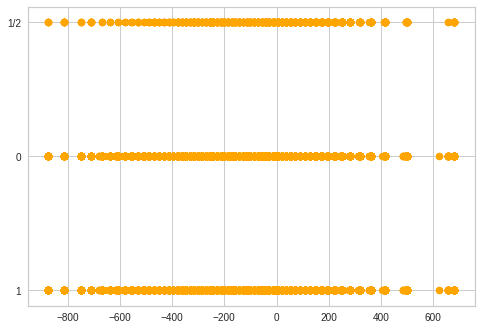

In [60]:
plt.scatter(interested.Diff, interested.Result, color='orange')

In [0]:
def get_train_dataset(interested):
  train=pd.DataFrame()
  columns = ['Event', 'OpponentBlunder', 'OpponentCaptures', 'OpponentCaptures', 'OpponentCastling', 'OpponentCheckMate', 
             'OpponentChecks', 'OpponentElo', 'OpponentPoorMove', 'OpponentPromote', 'OpponentPromoteQueen', 'OpponentQuestionableMoves', 
             'Opponent_End_Center', 'Opponent_Mid_Center', 'Opponent_Open_Center', 'PlayerBlunder', 'PlayerCaptures', 'PlayerCastling',
             'PlayerCheckMate', 'PlayerChecks', 'PlayerMoves', 'Player_Open_Diag', 'Player_Mid_Diag', 'Player_End_Diag', 'Player_Open_Pins', 'Player_Mid_Pins', 'Player_End_Pins',
             'Opponent_Open_Pins', 'Opponent_Mid_Pins', 'Opponent_End_Pins', 'Opponent_Open_Diag', 'Opponent_Mid_Diag', 'Opponent_End_Diag',
             'PlayerPoorMove', 'PlayerPromote', 'PlayerPromoteQueen', 'PlayerQuestionableMoves', 'Player_End_Center', 'Player_Mid_Center', 
             'Player_Open_Center', 'Result', 'isWhite','Diff', 'PlayerGainsMean', 'OpponentGainsMean','IsWhiteOpeningMove','ECO','ECO_Labels'] 
  for col in columns:
    train[col]=interested[col]
  train	['Moves'] = interested	['PlayerMoves']
  applyFunctionOverArrayInColumn(train, 'Moves', 'Q_Moves', lambda x: [index+1 for index, y in enumerate(x) if y.startswith('Q')], True)
  applyFunctionOverArrayInColumn(train, 'Moves', 'B_Moves', lambda x: [index+1 for index, y in enumerate(x) if y.startswith('B')], True)
  applyFunctionOverArrayInColumn(train, 'Moves', 'N_Moves', lambda x: [index+1 for index, y in enumerate(x) if y.startswith('N')], True)
  applyFunctionOverArrayInColumn(train, 'Moves', 'R_Moves', lambda x: [index+1 for index, y in enumerate(x) if y.startswith('R')], True)
  applyFunctionOverArrayInColumn(train, 'Moves', 'K_Moves', lambda x: [index+1 for index, y in enumerate(x) if y.startswith('K')], True)

  applyFunctionOverArrayInColumn(train, 'Q_Moves', 'Q_Moves_Num', lambda x: len(x), False)
  applyFunctionOverArrayInColumn(train, 'B_Moves', 'B_Moves_Num', lambda x: len(x), False)
  applyFunctionOverArrayInColumn(train, 'N_Moves', 'N_Moves_Num', lambda x: len(x), False)
  applyFunctionOverArrayInColumn(train, 'R_Moves', 'R_Moves_Num', lambda x: len(x), False)
  applyFunctionOverArrayInColumn(train, 'K_Moves', 'K_Moves_Num', lambda x: len(x), False)
  applyFunctionOverArrayInColumn(train, 'Moves', 'Total_Moves', lambda x: len(x), True)

  applyFunctionOverArrayInColumn(train, 'Q_Moves', 'Q_Moves_First', lambda x: x[0] if len(x) > 0 else -1, False)
  applyFunctionOverArrayInColumn(train, 'B_Moves', 'B_Moves_First', lambda x: x[0] if len(x) > 0 else -1, False)
  applyFunctionOverArrayInColumn(train, 'N_Moves', 'N_Moves_First', lambda x: x[0] if len(x) > 0 else -1, False)
  applyFunctionOverArrayInColumn(train, 'R_Moves', 'R_Moves_First', lambda x: x[0] if len(x) > 0 else -1, False)
  applyFunctionOverArrayInColumn(train, 'K_Moves', 'K_Moves_First', lambda x: x[0] if len(x) > 0 else -1, False)

  train.drop('Moves', axis=1, inplace=True, errors='ignore')
  train.drop('Q_Moves', axis=1, inplace=True, errors='ignore')
  train.drop('B_Moves', axis=1, inplace=True, errors='ignore')
  train.drop('N_Moves', axis=1, inplace=True, errors='ignore')
  train.drop('R_Moves', axis=1, inplace=True, errors='ignore')
  train.drop('K_Moves', axis=1, inplace=True, errors='ignore')
  train['Result']=train['Result'].replace('1/2',0.5)
  train['Result']=train['Result'].replace('*',0.5)
  train['Result'].fillna(0.5, inplace=True)
  train['Result'] = train['Result'].astype(float)

  return train;

In [0]:
train = get_train_dataset(interested)

In [0]:
def printMetrics(y_test, y_pred, message='Printing metric'):
  # regression coefficients 
  # print('Coefficients: \n', reg.coef_) 
  print("===============================================================================")
  print(message)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('R2 Score', sklearn.metrics.r2_score(y_test, y_pred))
  print("===============================================================================")
  
def perform_LinearRegression(train, interested,baseline=False):
  log("Expected time of completion: " + str(((0.328273)/199404)*train.shape[0]) + " seconds")
  start = datetime.now()
  if not baseline:
    train=train.drop('Event', axis=1)
    train=train.drop('OpponentElo', axis=1)
    train=train.drop('PlayerMoves', axis=1)
    train=train.drop('ECO', axis=1)
  
  print(train.columns)
  X_train, X_test, y_train, y_test = train_test_split(train, interested['PlayerElo'], test_size=0.2,random_state=1) 
  reg = LinearRegression() 
  
  # train the model using the training sets 
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test) 
  end = datetime.now()
  log("Time taken: " + str((end-start).microseconds/1000000) + "seconds for train shape:" + str(train.shape))
  
  printMetrics(y_test, y_pred, "Metrics for Linear Regression")
  return reg;
  
def perform_RandomForestRegressor(train, interested, baseline=False):
  start = datetime.now()
  log("Expected time of completion: " + str(((280)/199404)*train.shape[0]) + " seconds")
  if not baseline:
    train=train.drop('Event', axis=1)
    train=train.drop('OpponentElo', axis=1)
    train=train.drop('PlayerMoves', axis=1)
    train=train.drop('ECO', axis=1)
  
  
  print(train.columns)
  X_train, X_test, y_train, y_test = train_test_split(train, interested['PlayerElo'], test_size=0.2,random_state=1) 
  clf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test) 
  end = datetime.now()
  log("Time taken: " + str((end-start).seconds) + "seconds for train shape:" + str(train.shape))
  printMetrics(y_test, y_pred, "Metrics for Random Forest Regressor")
  return clf;

def perform_XBGBoostRegressor(train, interested,baseline=False):
  if not baseline:
    train=train.drop('Event', axis=1)
    train=train.drop('OpponentElo', axis=1)
    train=train.drop('PlayerMoves', axis=1)
    train=train.drop('ECO', axis=1)
  
  print(train.columns)
  X_train, X_test, y_train, y_test = train_test_split(train, interested['PlayerElo'].to_numpy(), test_size=0.2,random_state=1) 
  reg = XGBRegressor()
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test) 
  printMetrics(y_test, y_pred, "Metrics for XGBoost")
  return reg

In [65]:
train.columns

Index(['Event', 'OpponentBlunder', 'OpponentCaptures', 'OpponentCastling',
       'OpponentCheckMate', 'OpponentChecks', 'OpponentElo',
       'OpponentPoorMove', 'OpponentPromote', 'OpponentPromoteQueen',
       'OpponentQuestionableMoves', 'Opponent_End_Center',
       'Opponent_Mid_Center', 'Opponent_Open_Center', 'PlayerBlunder',
       'PlayerCaptures', 'PlayerCastling', 'PlayerCheckMate', 'PlayerChecks',
       'PlayerMoves', 'Player_Open_Diag', 'Player_Mid_Diag', 'Player_End_Diag',
       'Player_Open_Pins', 'Player_Mid_Pins', 'Player_End_Pins',
       'Opponent_Open_Pins', 'Opponent_Mid_Pins', 'Opponent_End_Pins',
       'Opponent_Open_Diag', 'Opponent_Mid_Diag', 'Opponent_End_Diag',
       'PlayerPoorMove', 'PlayerPromote', 'PlayerPromoteQueen',
       'PlayerQuestionableMoves', 'Player_End_Center', 'Player_Mid_Center',
       'Player_Open_Center', 'Result', 'isWhite', 'Diff', 'PlayerGainsMean',
       'OpponentGainsMean', 'IsWhiteOpeningMove', 'ECO', 'ECO_Labels',
       'Q_M

In [0]:
baseline_columns = ['OpponentBlunder', 'OpponentPoorMove', 'OpponentQuestionableMoves', 'PlayerBlunder',  'PlayerPoorMove', 'PlayerQuestionableMoves', 'Result', 'isWhite', 'Total_Moves']
train_baseline = train[baseline_columns]


In [78]:
linear_regression_model = perform_LinearRegression(train_baseline, interested,baseline=True)
random_forest_regressor_model = perform_RandomForestRegressor(train_baseline, interested,baseline=True)
xgboost_regressor_model = perform_XBGBoostRegressor(train_baseline,interested,baseline=True)

2019-12-07 03:23:03.242979 Expected time of completion: 0.4072742473370644 seconds
Index(['OpponentBlunder', 'OpponentPoorMove', 'OpponentQuestionableMoves',
       'PlayerBlunder', 'PlayerPoorMove', 'PlayerQuestionableMoves', 'Result',
       'isWhite', 'Total_Moves'],
      dtype='object')
2019-12-07 03:23:03.364531 Time taken: 0.121096seconds for train shape:(247392, 9)
Metrics for Linear Regression
Mean Absolute Error: 163.44714156458838
Mean Squared Error: 42059.60940639524
Root Mean Squared Error: 205.08439581400444
R2 Score 0.053131748594833494
2019-12-07 03:23:03.442293 Expected time of completion: 347.38400433291207 seconds
Index(['OpponentBlunder', 'OpponentPoorMove', 'OpponentQuestionableMoves',
       'PlayerBlunder', 'PlayerPoorMove', 'PlayerQuestionableMoves', 'Result',
       'isWhite', 'Total_Moves'],
      dtype='object')
2019-12-07 03:23:16.616763 Time taken: 13seconds for train shape:(247392, 9)
Metrics for Random Forest Regressor
Mean Absolute Error: 163.24288365282

In [66]:
linear_regression_model = perform_LinearRegression(train, interested)
random_forest_regressor_model = perform_RandomForestRegressor(train, interested)
xgboost_regressor_model = perform_XBGBoostRegressor(train,interested)

2019-12-07 03:06:37.613188 Expected time of completion: 0.4072742473370644 seconds
Index(['OpponentBlunder', 'OpponentCaptures', 'OpponentCastling',
       'OpponentCheckMate', 'OpponentChecks', 'OpponentPoorMove',
       'OpponentPromote', 'OpponentPromoteQueen', 'OpponentQuestionableMoves',
       'Opponent_End_Center', 'Opponent_Mid_Center', 'Opponent_Open_Center',
       'PlayerBlunder', 'PlayerCaptures', 'PlayerCastling', 'PlayerCheckMate',
       'PlayerChecks', 'Player_Open_Diag', 'Player_Mid_Diag',
       'Player_End_Diag', 'Player_Open_Pins', 'Player_Mid_Pins',
       'Player_End_Pins', 'Opponent_Open_Pins', 'Opponent_Mid_Pins',
       'Opponent_End_Pins', 'Opponent_Open_Diag', 'Opponent_Mid_Diag',
       'Opponent_End_Diag', 'PlayerPoorMove', 'PlayerPromote',
       'PlayerPromoteQueen', 'PlayerQuestionableMoves', 'Player_End_Center',
       'Player_Mid_Center', 'Player_Open_Center', 'Result', 'isWhite', 'Diff',
       'PlayerGainsMean', 'OpponentGainsMean', 'IsWhiteOpeningMo

In [69]:
print("Train Shape(Baseline): ", train_baseline.shape)
print()
print("Features in Baseline: ", train_baseline.columns)
print()
print("Train Shape(Feature Engineered): ", train.shape)
print()
print("Features Engineered: ", train.columns)

Train Shape(Baseline):  (247392, 13)

Features in Baseline:  Index(['OpponentBlunder', 'OpponentCheckMate', 'OpponentChecks',
       'OpponentPoorMove', 'OpponentQuestionableMoves', 'PlayerBlunder',
       'PlayerCheckMate', 'PlayerChecks', 'PlayerPoorMove',
       'PlayerQuestionableMoves', 'Result', 'isWhite', 'Total_Moves'],
      dtype='object')

Train Shape(Feature Engineered):  (247392, 58)

Features Engineered:  Index(['Event', 'OpponentBlunder', 'OpponentCaptures', 'OpponentCastling',
       'OpponentCheckMate', 'OpponentChecks', 'OpponentElo',
       'OpponentPoorMove', 'OpponentPromote', 'OpponentPromoteQueen',
       'OpponentQuestionableMoves', 'Opponent_End_Center',
       'Opponent_Mid_Center', 'Opponent_Open_Center', 'PlayerBlunder',
       'PlayerCaptures', 'PlayerCastling', 'PlayerCheckMate', 'PlayerChecks',
       'PlayerMoves', 'Player_Open_Diag', 'Player_Mid_Diag', 'Player_End_Diag',
       'Player_Open_Pins', 'Player_Mid_Pins', 'Player_End_Pins',
       'Opponent_O

In [0]:
player_gains_len = []
interested['PlayerGains'].map(lambda x : player_gains_len.append(len(x)))
interested['PlayerGainsLen'] = player_gains_len

In [0]:
interested['PlayerGains']

0         [89, 94, 192, 380, 382, 431, 439, 481, 445, 62...
1         [80, 214, 167, 98, 99, -306, -192, -138, -81, ...
2                                                  [83, 27]
3         [94, 150, 125, 182, 132, 27, 60, 116, 119, 150...
4                        [85, 161, 171, 222, 230, 307, 634]
                                ...                        
247917    [140, -29, -109, 31, -38, -48, -204, 120, 18, ...
247918    [124, 119, 13, -104, -181, -230, -225, -177, -...
247919    [102, 33, 24, 157, 338, 618, 484, 472, 472, 59...
247920    [85, 160, 112, 146, 195, 150, 349, 346, 123, 3...
247921             [121, -27, 102, 88, 249, 883, 994, 1165]
Name: PlayerGains, Length: 247392, dtype: object

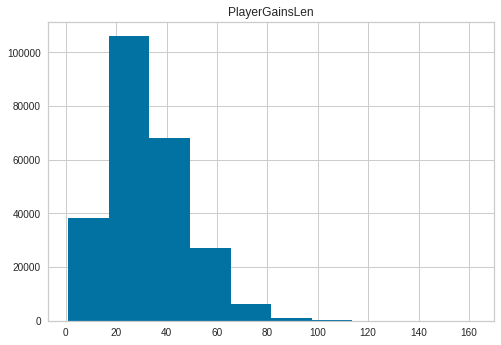

In [0]:
gain_sub_df = interested[['PlayerGainsLen']]
gain_sub_df.hist('PlayerGainsLen')
plt.show()

In [0]:
import tensorflow as tf
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras import models
from tensorflow.python.keras.models import Model,Sequential
from tensorflow.python.keras import initializers
from tensorflow.python.keras import regularizers

from tensorflow.python.keras.layers import Dense, GRU,LSTM, Input, Bidirectional,GlobalMaxPool1D
from tensorflow.python.keras.layers import Dropout

In [0]:
max_length = 30
player_gains_seq = sequence.pad_sequences(interested['PlayerGains'], maxlen=max_length, padding='post', truncating='post')
lstm_df = pd.DataFrame()

lstm_df['PlayerElo'] = interested.astype({'PlayerElo': 'int64'})['PlayerElo']
lstm_df['Player_Gains'] = interested['PlayerGains']
lstm_df['Range'] = pd.cut(lstm_df['PlayerElo'],[-1,1000,1500,2000,2500],labels=['<1000','1000-1500','1500-2000','>2000'])

In [0]:
lstmdf_upsampled.shape

(269147, 3)

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_new = lstm_df['Range']
Y_new = le.fit_transform(Y_new)
np.unique(le.inverse_transform(Y_new),return_counts=True)

(array(['1000-1500', '1500-2000', '<1000', '>2000'], dtype=object),
 array([ 85279, 153868,    534,   7711]))

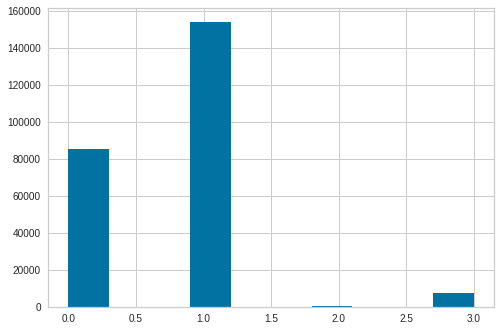

In [0]:
plt.hist(Y_new)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(player_gains_seq, Y_new, test_size=0.25, random_state=3)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True, dropout=0.5, recurrent_dropout=0.25),input_shape=(X_train.shape[1], 1)))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 7, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model.summary() 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 30, 100)           20800     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 357       
Total params: 26,207
Trainable params: 26,207
Non-trainable params: 0
_________________________________________________________________


In [0]:
import os
batch_size = 500
  
model.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size,
          epochs=5, verbose=1)

Train on 148435 samples, validate on 37109 samples
Epoch 1/5
148435/148435 [==============================] - 38s 257us/sample - loss: 0.8074 - accuracy: 0.6106 - val_loss: 0.7617 - val_accuracy: 0.6277
Epoch 2/5
148435/148435 [==============================] - 37s 253us/sample - loss: 0.7764 - accuracy: 0.6244 - val_loss: 0.7572 - val_accuracy: 0.6302
Epoch 3/5
148435/148435 [==============================] - 37s 251us/sample - loss: 0.7698 - accuracy: 0.6260 - val_loss: 0.7581 - val_accuracy: 0.6335
Epoch 4/5
148435/148435 [==============================] - 38s 253us/sample - loss: 0.7652 - accuracy: 0.6282 - val_loss: 0.7571 - val_accuracy: 0.6354
Epoch 5/5
148435/148435 [==============================] - 37s 250us/sample - loss: 0.7638 - accuracy: 0.6283 - val_loss: 0.7494 - val_accuracy: 0.6383


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(np.float64(X_test))
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('Classification Report(Elo Range):\n',classification_report(le.inverse_transform(y_test),le.inverse_transform(y_pred)),'\n')

Classification Report(Elo Range):
               precision    recall  f1-score   support

   1000-1500       0.55      0.21      0.30     21319
   1500-2000       0.65      0.91      0.76     38488
       <1000       0.00      0.00      0.00       135
       >2000       0.00      0.00      0.00      1906

    accuracy                           0.64     61848
   macro avg       0.30      0.28      0.27     61848
weighted avg       0.59      0.64      0.58     61848
 



In [0]:
Y_game_type = le.fit_transform(interested['Event'])
X_train_game_type, X_test_game_type, y_train_game_type, y_test_type = train_test_split(player_gains_seq, Y_game_type, test_size=0.25, random_state=42)

X_train_game_type = np.reshape(X_train_game_type, (X_train_game_type.shape[0], X_train_game_type.shape[1], 1))
X_test_game_type = np.reshape(X_test_game_type, (X_test_game_type.shape[0], X_test_game_type.shape[1], 1))

In [0]:
Y_game_type

array([2, 0, 1, ..., 0, 2, 2])

In [0]:
model.fit(X_train_game_type, y_train_game_type
          , validation_split=0.2, batch_size=batch_size,
          epochs=3, verbose=1)

Train on 148435 samples, validate on 37109 samples
Epoch 1/3
148435/148435 [==============================] - 37s 251us/sample - loss: 1.1286 - accuracy: 0.4019 - val_loss: 1.0905 - val_accuracy: 0.4105
Epoch 2/3
148435/148435 [==============================] - 37s 248us/sample - loss: 1.0953 - accuracy: 0.4091 - val_loss: 1.0883 - val_accuracy: 0.4121
Epoch 3/3
148435/148435 [==============================] - 37s 250us/sample - loss: 1.0938 - accuracy: 0.4107 - val_loss: 1.0890 - val_accuracy: 0.4124


In [0]:
Y_pred = model.predict(np.float64(X_test))
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('Classification Report(Elo Range):\n',classification_report(le.inverse_transform(y_test),le.inverse_transform(y_pred)),'\n')

Classification Report(Elo Range):
                 precision    recall  f1-score   support

         Blitz       0.34      0.97      0.50     21319
        Bullet       0.77      0.00      0.00     38488
       Classic       0.01      0.04      0.01       135
Correspondence       0.00      0.00      0.00      1906

      accuracy                           0.34     61848
     macro avg       0.28      0.25      0.13     61848
  weighted avg       0.59      0.34      0.18     61848
 



In [0]:
np.unique(interested['Event'],return_counts=True)

(array(['Blitz', 'Bullet', 'Classic', 'Correspondence'], dtype=object),
 array([101270,  61974,  83626,    522]))

In [0]:
np.unique(le.inverse_transform(y_pred))

array(['Blitz'], dtype=object)

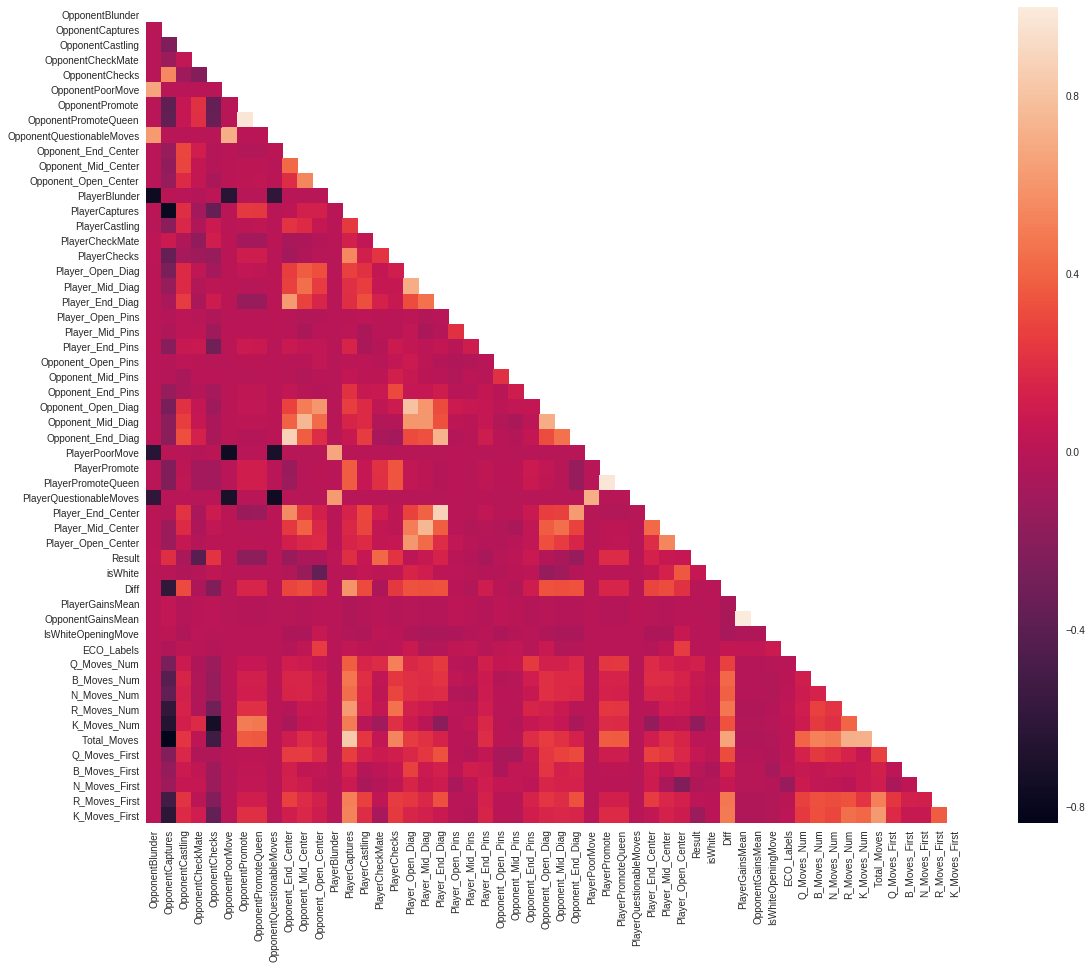

In [81]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True)


In [0]:
def get_kaggle_format_data(linear_regression_model, train): 
  y_pred_kaggle = linear_regression_model.predict(train.drop(['OpponentElo'],axis=1)) 
  kaggle_submit = train.copy()
  kaggle_submit['PlayerElo'] = y_pred_kaggle
  kaggle_submit = kaggle_submit[['Event','PlayerElo']]
  white_kaggle_submit = kaggle_submit[0:25000]
  black_kaggle_submit = kaggle_submit[25000:]
  white_kaggle_submit=white_kaggle_submit.rename(columns={'PlayerElo':'WhiteElo'})
  black_kaggle_submit=black_kaggle_submit.rename(columns={'PlayerElo':'BlackElo'})
  kaggle_submit = white_kaggle_submit.merge(black_kaggle_submit, on='Event')
  return kaggle_submit;

In [0]:
kaggle_format = get_kaggle_format_data(linear_regression_model, train)

In [0]:
kaggle_format.to_csv('/content/drive/My Drive/DSF_Project/KaggleDataEDA/submission1.csv',index=False)

In [0]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, interested['PlayerElo']], axis = 1)

In [0]:

model = ols("PlayerElo ~ PC1 + PC2", data=finalDf).fit()
print(model.summary())

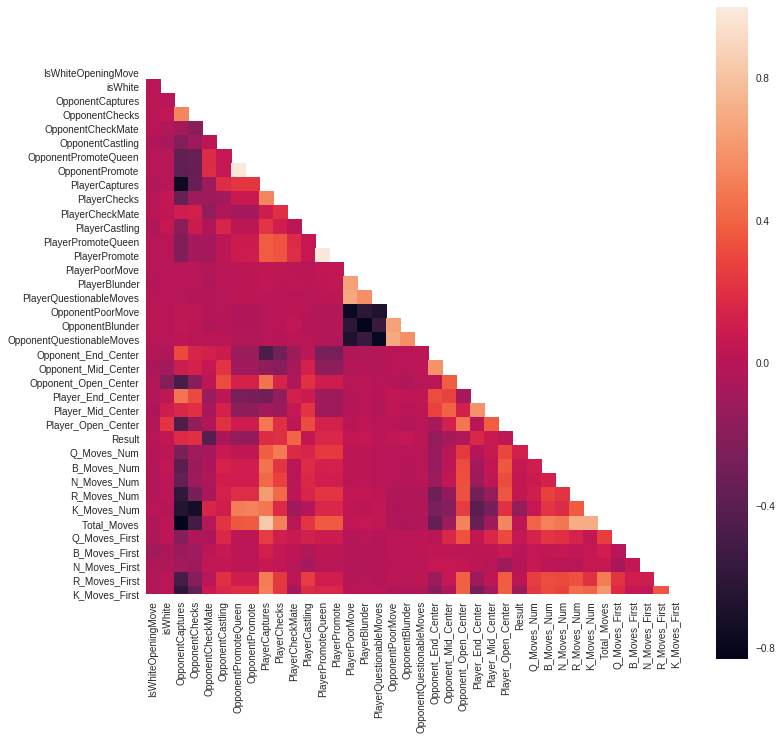

In [0]:
# Compute the correlation matrix
corr = features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True)


In [0]:
!python pgn_to_json_csv_converter_aps.py Kaggle/data.pgn w 50000 1000 true

Gathering from files: ['Kaggle/data.pgn']
Starting with file: <_io.TextIOWrapper name='Kaggle/data.pgn' mode='r' encoding='UTF-8'>
Processed games:  1000 | Process time:    91.20 | Batch time: 91.19
Processed games:  2000 | Process time:   187.74 | Batch time: 96.55
Processed games:  3000 | Process time:   288.93 | Batch time: 101.19
Processed games:  4000 | Process time:   394.44 | Batch time: 105.51
Processed games:  5000 | Process time:   513.09 | Batch time: 118.65
Processed games:  6000 | Process time:   625.95 | Batch time: 112.86
Processed games:  7000 | Process time:   737.08 | Batch time: 111.13
Processed games:  8000 | Process time:   861.18 | Batch time: 124.10
Processed games:  9000 | Process time:   976.22 | Batch time: 115.04
Processed games: 10000 | Process time:  1099.42 | Batch time: 123.20
Processed games: 11000 | Process time:  1215.45 | Batch time: 116.03
Processed games: 12000 | Process time:  1337.96 | Batch time: 122.51
Processed games: 13000 | Process time:  146

This strategy only consider endgame statistics, There is scope to look into mid game stats too.



Check opening moves in perspective of white and black

isBlack,
NegativeMoves Percent


In [0]:
#HERE

Index(['OpponentBlunder', 'OpponentCaptures', 'OpponentCastling',
       'OpponentCheckMate', 'OpponentChecks', 'OpponentPoorMove',
       'OpponentPromote', 'OpponentPromoteQueen', 'OpponentQuestionableMoves',
       'Opponent_End_Center', 'Opponent_Mid_Center', 'Opponent_Open_Center',
       'PlayerBlunder', 'PlayerCaptures', 'PlayerCastling', 'PlayerCheckMate',
       'PlayerChecks', 'Player_Open_Diag', 'Player_Mid_Diag',
       'Player_End_Diag', 'Player_Open_Pins', 'Player_Mid_Pins',
       'Player_End_Pins', 'Opponent_Open_Pins', 'Opponent_Mid_Pins',
       'Opponent_End_Pins', 'Opponent_Open_Diag', 'Opponent_Mid_Diag',
       'Opponent_End_Diag', 'PlayerPoorMove', 'PlayerPromote',
       'PlayerPromoteQueen', 'PlayerQuestionableMoves', 'Player_End_Center',
       'Player_Mid_Center', 'Player_Open_Center', 'Result', 'isWhite',
       'Q_Moves_Num', 'B_Moves_Num', 'N_Moves_Num', 'R_Moves_Num',
       'K_Moves_Num', 'Total_Moves', 'Q_Moves_First', 'B_Moves_First',
       'N_Moves_F

In [0]:
# linear_regression_model = perform_LinearRegression(train, interested)
# random_forest_refressor_model = perform_RandomForestRegressor(train, interested)
train_copy = train.copy()
train_copy=train_copy.drop('Event', axis=1)
train_copy=train_copy.drop('OpponentElo', axis=1)
train_copy=train_copy.drop('PlayerMoves', axis=1)
print(train_copy.columns)
X_train, X_test, y_train, y_test = train_test_split(train_copy, interested['PlayerElo'].to_numpy(), test_size=0.2,random_state=1) 
reg = XGBRegressor()

# train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test) 
printMetrics(y_test, y_pred, "Metrics for XGBoost")

Index(['OpponentBlunder', 'OpponentCaptures', 'OpponentCastling',
       'OpponentCheckMate', 'OpponentChecks', 'OpponentPoorMove',
       'OpponentPromote', 'OpponentPromoteQueen', 'OpponentQuestionableMoves',
       'Opponent_End_Center', 'Opponent_Mid_Center', 'Opponent_Open_Center',
       'PlayerBlunder', 'PlayerCaptures', 'PlayerCastling', 'PlayerCheckMate',
       'PlayerChecks', 'Player_Open_Diag', 'Player_Mid_Diag',
       'Player_End_Diag', 'Player_Open_Pins', 'Player_Mid_Pins',
       'Player_End_Pins', 'Opponent_Open_Pins', 'Opponent_Mid_Pins',
       'Opponent_End_Pins', 'Opponent_Open_Diag', 'Opponent_Mid_Diag',
       'Opponent_End_Diag', 'PlayerPoorMove', 'PlayerPromote',
       'PlayerPromoteQueen', 'PlayerQuestionableMoves', 'Player_End_Center',
       'Player_Mid_Center', 'Player_Open_Center', 'Result', 'isWhite',
       'Q_Moves_Num', 'B_Moves_Num', 'N_Moves_Num', 'R_Moves_Num',
       'K_Moves_Num', 'Total_Moves', 'Q_Moves_First', 'B_Moves_First',
       'N_Moves_F

In [0]:
type(interested['PlayerElo'].to_numpy())

numpy.ndarray

In [0]:
complete_dataset = pd.read_csv('/content/drive/My Drive/Project-Final/PGNParse/Final-Data/data.csv')

In [0]:
complete_dataset_copy = complete_dataset.copy()

In [0]:

# complete_dataset=pd.DataFrame(complete_dataset)
# print(complete_dataset['Moves'].head(5))
complete_dataset['BlackMoves']=complete_dataset['Moves']	
# print(complete_dataset['BlackMoves'].head(5))
complete_dataset['BlackMoves'] = complete_dataset['BlackMoves'].str[1:]
# print(complete_dataset['BlackMoves'].head(5))
complete_dataset['BlackMoves'] = complete_dataset['BlackMoves'].str[:-1]
# print(complete_dataset['BlackMoves'].head(5))
complete_dataset['BlackMoves']=complete_dataset['BlackMoves'].str.split(', ')
# print(complete_dataset['BlackMoves'].head(5))

print(complete_dataset.shape)
print(complete_dataset.head(10001).tail(5))
complete_dataset_copy2=complete_dataset.head(10001)
# print(complete_dataset_copy2['Moves'])
# print(complete_dataset_copy2.BlackMoves.map(lambda x: x[1::2]))
min_moves=10
applyFunctionOverArrayInColumn(complete_dataset_copy2, 'WhiteCenter', 'White_Open_Center', lambda x: np.mean(np.array_split(x, 3)[0]) if len(x) > min_moves else 0.0, False, True)

(123974, 28)
                      Event  ...                                         BlackMoves
9996       Rated Blitz game  ...  ['e4', 'c5', 'Nf3', 'd6', 'Nc3', 'Nc6', 'd4', ...
9997   Rated Classical game  ...  ['e4', 'e5', 'Nf3', 'Nc6', 'Bb5', 'Bc5', 'Bxc6...
9998      Rated Bullet game  ...  ['e4', 'e5', 'Nf3', 'Nc6', 'Bc4', 'Bc5', 'O-O'...
9999   Rated Classical game  ...  ['d4', 'd5', 'Nf3', 'Bf5', 'e3', 'Nc6', 'Bd3',...
10000                 Event  ...                                              [ove]

[5 rows x 28 columns]


ValueError: ignored

In [0]:
complete_dataset[complete_dataset['Event']=='Event']

,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,BlackMoves
10000,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]
20001,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]
30002,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]
40003,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]
43965,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]
53966,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]
63967,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]
73968,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]
83969,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]
93970,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,ZobristHash,EngineEvals,Comments,WhiteCenter,BlackCenter,WhiteDiag,BlackDiag,WhitePins,BlackPins,[ove]


In [0]:
train.columns

Index(['Event', 'OpponentBlunder', 'OpponentCaptures', 'OpponentCastling',
       'OpponentCheckMate', 'OpponentChecks', 'OpponentElo',
       'OpponentPoorMove', 'OpponentPromote', 'OpponentPromoteQueen',
       'OpponentQuestionableMoves', 'Opponent_End_Center',
       'Opponent_Mid_Center', 'Opponent_Open_Center', 'PlayerBlunder',
       'PlayerCaptures', 'PlayerCastling', 'PlayerCheckMate', 'PlayerChecks',
       'PlayerMoves', 'Player_Open_Diag', 'Player_Mid_Diag', 'Player_End_Diag',
       'Player_Open_Pins', 'Player_Mid_Pins', 'Player_End_Pins',
       'Opponent_Open_Pins', 'Opponent_Mid_Pins', 'Opponent_End_Pins',
       'Opponent_Open_Diag', 'Opponent_Mid_Diag', 'Opponent_End_Diag',
       'PlayerPoorMove', 'PlayerPromote', 'PlayerPromoteQueen',
       'PlayerQuestionableMoves', 'Player_End_Center', 'Player_Mid_Center',
       'Player_Open_Center', 'Result', 'isWhite', 'Q_Moves_Num', 'B_Moves_Num',
       'N_Moves_Num', 'R_Moves_Num', 'K_Moves_Num', 'Total_Moves',
       'Q_Mo

In [0]:
complete_dataset['EngineEvals'].head(10)

0    ['+89', '-18', '+76', '-36', '+156', '-130', '...
1    ['+80', '-73', '+141', '-52', '+115', '-24', '...
2                                ['+83', '+50', '+77']
3    ['+94', '-56', '+94', '-18', '+107', '-62', '+...
4    ['+85', '-60', '+101', '-63', '+108', '-97', '...
5    ['+100', '-16', '+65', '-28', '+157', '-103', ...
6    ['+102', '-36', '+86', '+101', '-34', '+105', ...
7    ['+61', '-47', '+90', '+64', '+24', '+82', '+3...
8    ['+55', '+92', '-56', '+92', '+54', '+41', '+1...
9    ['+69', '+47', '+50', '+73', '+65', '+81', '+3...
Name: EngineEvals, dtype: object

In [0]:
!python --version

Python 3.6.9


In [0]:
import math
from scipy.stats import norm  

def get_diff(moves):
	print(moves)
	gains = [(moves[j+1] - moves[j]) if j%2 == 1 else -(moves[j+1] - moves[j]) for j in range(len(moves) - 1)]
	gains.insert(0, moves[0])
	print("Gains:",gains)
	white_gains = [gain for i, gain in enumerate(gains) if (i%2)==0]
	black_gains = [gain for i, gain in enumerate(gains) if (i%2)==1]
	print(white_gains, black_gains)
	white_hist, white_bins = np.histogram(white_gains, bins=20, range=(-100,100))
	black_hist, black_bins = np.histogram(black_gains, bins=20, range=(-100,100))
	print(white_hist, black_hist)
	p = 0.5 * (white_hist[0] * black_hist[0]) + sum([white_hist[i] * black_hist[i] for i in range(1, len(white_hist))])
	print(p)
	d = 200 * math.pow(2, 0.5) * norm.cdf(p)
	return d

In [0]:
a = pd.DataFrame(complete_dataset['EngineEvals'].head(401).tail(1))

a.columns = ['EngineEvals']
a['EngineEvals'] = a['EngineEvals'].str[1:]
a['EngineEvals'] = a['EngineEvals'].str[:-1]
a['EngineEvals'] = a['EngineEvals'].str.split(', ')

a.loc[:, 'EngineEvals'] = a.EngineEvals.map(lambda x: [int(xi[1:-1]) if xi[1] == '+' else int(xi[1:-1]) for xi in x if xi[1] != '#'])


get_diff(a['EngineEvals'].to_numpy()[0])

[61, -43, 60, -21, 30, -11, 177, -48, 168, -57, 128, -93, 175, -115, 386, -199, 176, 7, 100, 65, -51, 137, 131, 31, 42, 165, 444, -513, 642]
[61, 104, 103, 81, 51, 41, 188, 225, 216, 225, 185, 221, 268, 290, 501, 585, 375, 169, 93, 35, -116, -188, -6, 100, 11, -123, 279, 957, 1155]
[61, 103, 51, 188, 216, 185, 268, 501, 375, 93, -116, -6, 11, 279, 1155] [104, 81, 41, 225, 225, 221, 290, 585, 169, 35, -188, 100, -123, 957]
[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1]
1.0


237.96823010429623

In [0]:
print(type(a))

<class 'pandas.core.frame.DataFrame'>


In [0]:
  a = pd.DataFrame(complete_dataset['EngineEvals'])
  a.columns = ['EngineEvals']
  a['EngineEvals'] = a['EngineEvals'].str[1:]
  a['EngineEvals'] = a['EngineEvals'].str[:-1]
  a['EngineEvals'] = a['EngineEvals'].str.split(', ')
  a.loc[:, 'EngineEvals'] = a.EngineEvals.map(lambda x: [int(xi[1:-1]) if xi[1] == '+' else int(xi[1:-1]) for xi in x if xi[1] != '#'])
  complete_dataset['EngineEvals']=a['EngineEvals']
  complete_dataset['BlackMoves']=complete_dataset['EngineEvals']	
  
  gains = [(moves[j+1] - moves[j]) if j%2 == 1 else -(moves[j+1] - moves[j]) for j in range(len(moves) - 1)]  
  complete_dataset['BlackMoves'] = complete_dataset['BlackMoves'].str[1:]
  complete_dataset['BlackMoves'] = complete_dataset['BlackMoves'].str[:-1]
  complete_dataset['BlackMoves']=complete_dataset['BlackMoves'].str.split(', ')


In [0]:
complete_dataset_sample = complete_dataset.head(401).tail(10)

In [0]:
a = pd.DataFrame(complete_dataset['EngineEvals'].head(401).tail(10))
a.columns = ['EngineEvals']
a['EngineEvals'] = a['EngineEvals'].str[1:]
a['EngineEvals'] = a['EngineEvals'].str[:-1]
a['EngineEvals'] = a['EngineEvals'].str.split(', ')

a.loc[:, 'EngineEvals'] = a.EngineEvals.map(lambda x: [int(xi[1:-1]) if xi[1] == '+' else int(xi[1:-1]) for xi in x if xi[1] != '#'])

print(a)
a=a['EngineEvals'].to_numpy()[1]
print("Moves:",a)
moves =a 
gains = [(moves[j+1] - moves[j]) if j%2 == 1 else -(moves[j+1] - moves[j]) for j in range(len(moves) - 1)]
gains.insert(0, moves[0])
print("Gains:",gains)
white_gains = [gain for i, gain in enumerate(gains) if (i%2)==0]
black_gains = [gain for i, gain in enumerate(gains) if (i%2)==1]


# print("White Gains:",white_gains)
# print("Black Gains:",black_gains)


                                           EngineEvals
391  [118, -48, 80, 45, 12, 76, -29, 92, -68, 129, ...
392  [80, -35, 105, -27, 63, 26, -8, 417, -391, 492...
393  [75, -23, 94, 39, 3, 85, -122, 175, -80, 152, ...
394  [64, 20, 218, 2, 55, -41, 88, -25, 51, -41, 16...
395  [73, 105, 74, 126, -87, 70, -16, 107, 9, 97, 3...
396  [37, -37, 111, -48, 123, 25, 157, 169, 93, -18...
397  [50, -46, 95, 0, 62, 58, 25, 38, 94, -25, 72, ...
398  [50, -48, 128, -41, 120, -88, 137, -130, 147, ...
399  [80, -27, 51, -21, 52, 65, -7, 48, 33, -16, 65...
400  [61, -43, 60, -21, 30, -11, 177, -48, 168, -57...
Moves: [80, -35, 105, -27, 63, 26, -8, 417, -391, 492, -424, 704, -568, 994, -952, 1074, -949, 1006, -934, 1000, -929, 980, -948, 965, -936, 1034, -988, 1054, -922, 964, -897, 1128, -978, 968, -663, 880, -312, 413, 304, -317, 426, -491, 786, -156, 806, -777, 870, -744, 912, -791, 862, -880, 960, -695, 821, -711, 813, -744, 833, -744, 897, -853, 1034, -720, 862, -766, 862, -704, 792, -777, 807

In [0]:

complete_dataset_sample.loc[:, 'EngineEvals'] = complete_dataset_sample.EngineEvals.map(lambda x: [int(xi[1:-1]) if xi[1] == '+' else int(xi[1:-1]) for xi in x if xi[1] != '#'])

a = pd.DataFrame(complete_dataset['EngineEvals'].head(401).tail(10))
a.columns = ['EngineEvals']
a['EngineEvals'] = a['EngineEvals'].str[1:]
a['EngineEvals'] = a['EngineEvals'].str[:-1]
a['EngineEvals'] = a['EngineEvals'].str.split(', ')

a.loc[:, 'EngineEvals'] = a.EngineEvals.map(lambda x: [int(xi[1:-1]) if xi[1] == '+' else int(xi[1:-1]) for xi in x if xi[1] != '#'])

print(a)
a=a['EngineEvals'].to_numpy()[1]
print("Moves:",a)
moves =a 
gains = [(moves[j+1] - moves[j]) if j%2 == 1 else -(moves[j+1] - moves[j]) for j in range(len(moves) - 1)]
gains.insert(0, moves[0])
# print("Gains:",gains)
white_gains = [gain for i, gain in enumerate(gains) if (i%2)==0]
black_gains = [gain for i, gain in enumerate(gains) if (i%2)==1]


# print("White Gains:",white_gains)
# print("Black Gains:",black_gains)


In [0]:
complete_dataset_sample['EngineEvals'] = complete_dataset_sample['EngineEvals'].str[1:]
complete_dataset_sample['EngineEvals'] = complete_dataset_sample['EngineEvals'].str[:-1]
complete_dataset_sample['EngineEvals'] = complete_dataset_sample['EngineEvals'].str.split(', ')

complete_dataset_sample.loc[:, 'EngineEvals'] = complete_dataset_sample.EngineEvals.map(lambda x: [int(xi[1:-1]) if xi[1] == '+' else int(xi[1:-1]) for xi in x if xi[1] != '#'])

In [0]:
complete_dataset_sample.EngineEvals.head(4)

391    [118, -48, 80, 45, 12, 76, -29, 92, -68, 129, ...
392    [80, -35, 105, -27, 63, 26, -8, 417, -391, 492...
393    [75, -23, 94, 39, 3, 85, -122, 175, -80, 152, ...
394    [64, 20, 218, 2, 55, -41, 88, -25, 51, -41, 16...
Name: EngineEvals, dtype: object

In [0]:
gains = [(moves[j+1] - moves[j]) if j%2 == 1 else -(moves[j+1] - moves[j]) for j in range(len(moves) - 1)]

In [0]:
complete_dataset_sample['Gains'] = complete_dataset_sample['EngineEvals']

In [0]:
complete_dataset_sample.loc[:, 'Gains']=complete_dataset_sample.Gains.map(lambda x : get_gains(x))

In [0]:
complete_dataset_sample[['EngineEvals','Gains']].head(1)

,EngineEvals,Gains
391,"[118, -48, 80, 45, 12, 76, -29, 92, -68, 129, ...","[118, 166, 128, 35, -33, -64, -105, -121, -160..."


In [0]:
# get_diff(complete_dataset.EngineEvals[0])


a = pd.DataFrame(complete_dataset_sample['EngineEvals'].head(1))
a.columns = ['EngineEvals']
a['EngineEvals'] = a['EngineEvals'].str[1:]
a['EngineEvals'] = a['EngineEvals'].str[:-1]
a['EngineEvals'] = a['EngineEvals'].str.split(', ')

a.loc[:, 'EngineEvals'] = a.EngineEvals.map(lambda x: [int(xi[1:-1]) if xi[1] == '+' else int(xi[1:-1]) for xi in x if xi[1] != '#'])

print("A:",a)
a=a['EngineEvals'].to_numpy()[1]
print(get_diff(a))

In [0]:
complete_dataset_sample['WhiteGains'] = complete_dataset_sample['Gains']
complete_dataset_sample['BlackGains'] = complete_dataset_sample['Gains']
complete_dataset_sample.loc[:, 'WhiteGains'] = complete_dataset_sample.WhiteGains.map(lambda x: x[0::2])
complete_dataset_sample.loc[:, 'BlackGains'] = complete_dataset_sample.BlackGains.map(lambda x: x[1::2])

In [0]:
complete_dataset_sample[['Gains', 'WhiteGains', 'BlackGains']].head(1)

,Gains,WhiteGains,BlackGains
391,"[118, 166, 128, 35, -33, -64, -105, -121, -160...","[118, 128, -33, -105, -160, -197, -165, -12, -...","[166, 35, -64, -121, -197, -203, -85, -175, -1..."


In [0]:
black_sample = pd.DataFrame(complete_dataset_sample[['BlackGains','WhiteGains']])
white_sample = pd.DataFrame(complete_dataset_sample[['WhiteGains','BlackGains']])

black_sample.columns = ['PlayerGains','OpponentGains']
white_sample.columns = ['PlayerGains','OpponentGains']
white_sample=white_sample.append(black_sample)

In [0]:
# print(white_sample)
# print(type(white_sample))
white_sample.loc[:, 'Diff'] = white_sample.head(10).apply(get_d_score, axis=1)

[118, 128, -33, -105, -160, -197, -165, -12, -288, -133, -649, -384, -229, -294, -343, -379, -78, -101, 72, -179]
[166, 35, -64, -121, -197, -203, -85, -175, -171, -369, -577, -306, -273, -256, -349, -305, -57, -115, 117]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0] [0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
141.4213562373095
[80, 140, 90, -34, -808, -916, -1272, -1946, -2023, -1940, -1929, -1928, -1901, -2022, -1976, -1861, -2106, -1631, -1192, -109, 743, 1277, 962, 1647, 1656, 1653, 1840, 1516, 1524, 1577, 1641, 1887, 1582, 1628, 1496, 1584, 1576, 1298, 1288, 1404, 1324, 1365, 1281, 1319, 1296, 1238, 1272, 1080, 1043, 996, 908, 682, 582, 680, 724, 800, 105, 52, 22, 25, 50, 0, 54, 0, -62, 0, -19, 18, 33, -45, -68, -79, -190, -6, -129, -405, -201, -247, -823, -1119, -1816, -1576, -13120, -11218, -11218, -13515, -14598, -15795, -17010]
[115, 132, 37, -425, -883, -1128, -1562, -2026, -1955, -1934, -1909, -1913, -1970, -2042, -1886, -2025, -1946, -1543, -725, 621, 917, 942, 1583, 1614, 1703, 

In [0]:
white_sample

,PlayerGains,OpponentGains,Diff
391,"[118, 128, -33, -105, -160, -197, -165, -12, -...","[166, 35, -64, -121, -197, -203, -85, -175, -1...",141.421356
392,"[80, 140, 90, -34, -808, -916, -1272, -1946, -...","[115, 132, 37, -425, -883, -1128, -1562, -2026...",282.842712
393,"[75, 117, -36, -207, -255, -245, -208, -13, -3...","[98, 55, -82, -297, -232, -253, -92, -172, -30...",141.421356
394,"[64, 198, 53, 129, 76, 202, 112, 136, 215, 261...","[44, 216, 96, 113, 92, 187, 70, 220, 223, 273,...",282.842712
395,"[73, -31, -213, -86, -98, -59, 30, -137, -180,...","[-32, -52, -157, -123, -88, 43, -92, -284, 71,...",282.842712
396,"[37, 148, 171, 132, -76, 138, 223, 23, 205, 12...","[74, 159, 98, -12, 111, 45, 200, 193, 128, 101...",141.421356
397,"[50, 141, 62, -33, 56, 97, 43, 1, 7, 1, -155, ...","[96, 95, 4, -13, 119, 73, -4, 47, -63, -24, -1...",282.842712
398,"[50, 176, 161, 225, 277, 211, 239, 224, 321, 3...","[98, 169, 208, 267, 246, 188, 245, 242, 356, 4...",237.968230
399,"[80, 78, 73, -72, -15, 81, 160, 166, 161, 243,...","[107, 72, -13, -55, 49, 101, 193, 118, 237, 10...",282.842712
400,"[61, 103, 51, 188, 216, 185, 268, 501, 375, 93...","[104, 81, 41, 225, 225, 221, 290, 585, 169, 35...",237.968230


In [0]:
complete_dataset_sample.dtypes